**Version: 1.0.1**

If you encounter any errors, please contact me. I will complete the verification and make corrections as soon as possible.

# Usage Guide

This code consists of three sections: AutoML, Interpretability Analysis, and Exploratory Factor Analysis (EFA).
When using this code, please remember to cite this article. 
Each section includes detailed comments, so please modify the respective variables according to the comments to complete your research.

0. **Preoaration**
1. **AutoML**: Utilize AutoML tools for model training and optimization.
2. **Interpretability Analysis**: Use tools like SHAP for model interpretability analysis to identify important features and their relationships.
3. **Exploratory Factor Analysis (EFA)**: Conduct EFA to uncover the underlying factor structure in the data.

Please adjust the respective variables and parameters according to your specific needs to fit your research data and objectives.


# 0 Preparation

In this section, you need to import the necessary libraries for the code to function correctly. Ensure that each library is successfully imported before proceeding with further steps.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from autogluon.tabular import TabularDataset, TabularPredictor
from scipy import stats
import shap
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo, Rotator
from sklearn.decomposition import PCA


## 0.1 Data Import
**Feature Engineering**

In this section, you need to import your data and ensure it is converted into a tabular format, with the first row containing the column names. Modify the file path to the CSV file that contains your data.

In [6]:
# Modify the file path to point to your CSV data file
# Load the data into a pandas DataFrame
file_path = './Example Data.csv'
data=pd.read_csv(file_path,header=0) 
# Display the first few rows of the data to verify successful import
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: './Example Data.csv'

## 0.2 Data Selection

In psychological research, not all features are necessarily included in the analysis. 
Therefore, after `data.iloc`, input all the variables you wish to include (including the dependent variable). 
Modify the line `target = data['CD-RISC']` by replacing `CD-RISC` with the name of your dependent variable as it appears in your CSV file.

In [3]:
# Modify with the columns you need
features = data.iloc[:, 1:44]

# Modify 'CD-RISC' to the name of your dependent variable
target = data['CD-RISC']

data = pd.concat([features, target], axis=1)
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        data[column] = data[column].astype('float')

## 0.3 Handling Anomalies
To facilitate checking for anomalies in the data, count the unique values in each column. 
For example, we can see an anomaly in the "Age" column. There is an erroneous value: `Value: 2.0, Count: 1`, where the age was mistakenly entered as 2.
You can follow this example to modify and handle the anomalies in your data. Adjust the variable name and the range according to your needs.

In [4]:
# Count unique values in each column to check for anomalies
for column in data.columns:
    print(f"Column: {column}")
    value_counts = data[column].value_counts(dropna=False)
    for value, count in value_counts.items():
        print(f"Value: {value}, Count: {count}")
    print("\n")

Column: Gender
Value: 1.0, Count: 314
Value: 2.0, Count: 274
Value: 3.0, Count: 2


Column: Age
Value: 20.0, Count: 205
Value: 19.0, Count: 157
Value: 21.0, Count: 113
Value: 18.0, Count: 53
Value: 22.0, Count: 48
Value: 23.0, Count: 11
Value: 24.0, Count: 2
Value: 2.0, Count: 1


Column: Grade
Value: 2.0, Count: 284
Value: 3.0, Count: 132
Value: 1.0, Count: 108
Value: 4.0, Count: 62
Value: 5.0, Count: 4


Column: Major
Value: 1.0, Count: 213
Value: 5.0, Count: 173
Value: 2.0, Count: 171
Value: 3.0, Count: 24
Value: 4.0, Count: 9


Column: Only child
Value: 2.0, Count: 314
Value: 1.0, Count: 276


Column: Residence
Value: 2.0, Count: 331
Value: 1.0, Count: 257
Value: 3.0, Count: 1
Value: nan, Count: 1


Column: Number of online groups
Value: 3.0, Count: 231
Value: 1.0, Count: 203
Value: 2.0, Count: 92
Value: 4.0, Count: 61
Value: nan, Count: 3


Column: Internet age
Value: 4.0, Count: 383
Value: 3.0, Count: 106
Value: 2.0, Count: 64
Value: 1.0, Count: 28
Value: nan, Count: 9


Column: 

In [5]:
#To address anomalies, replace values in the "Age" column that are less than 18 or greater than 24 with null values.
data.loc[(data['Age'] < 18) | (data['Age'] > 24), 'Age'] = np.nan

In [6]:
# View Missing Value Proportions
null_ratio = data.isnull().mean()
print(null_ratio)

Gender                          0.000000
Age                             0.001695
Grade                           0.000000
Major                           0.000000
Only child                      0.000000
Residence                       0.001695
Number of online groups         0.005085
Internet age                    0.015254
Daily online duration           0.003390
Number of friends met online    0.008475
SES7                            0.005085
SES3                            0.000000
SES9R                           0.000000
SES4                            0.001695
SES5R                           0.000000
SES10                           0.001695
SES1                            0.001695
SES8R                           0.000000
SES6R                           0.000000
SES2R                           0.000000
SWLS1                           0.003390
SWLS2                           0.000000
SWLS3                           0.001695
SWLS4                           0.000000
SWLS5           

In [7]:
# Filling Missing Values with Mean
# data.fillna(data.mean(), inplace=True)
# Filling Missing Values with Median
# data.fillna(data.median(), inplace=True)
# Filling Missing Values with Mode
data.fillna(data.mode().iloc[0], inplace=True)

## 0.4 Data Standardization or Normalization

In this section, you will standardize or normalize the selected columns in your dataset. 
Standardization transforms the data to have a mean of 0 and a standard deviation of 1. 
Normalization scales the data to a range between 0 and 1.

In [8]:
# Extract the columns to be standardized
columns_to_scale = ['Age'] + list(data.columns[6:43])
# Initialize the StandardScaler
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
# Initialize the MinMaxScaler
# min_max_scaler = MinMaxScaler()
# data[columns_to_scale] = min_max_scaler.fit_transform(data[columns_to_scale])

## 0.5 Encoding Categorical Variables

Psychological research often involves many categorical variables. We can handle these by applying one-hot encoding to convert them into a format suitable for machine learning algorithms.

In [9]:
# List of categorical columns to be encoded
# Replace with your categorical columns
columns_to_encode = ['Gender','Grade', 'Major', 'Only child', 'Residence']
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the categorical features
encoded_features = encoder.fit_transform(data[columns_to_encode])
# Convert encoded features to a DataFrame
encoded_columns = encoder.get_feature_names_out(columns_to_encode)
# Reset index to match the original DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=data.index)

# Drop the original categorical columns from the data
data.drop(columns=columns_to_encode, inplace=True)
data = pd.concat([data, encoded_df], axis=1)
data.head()

,Age,Number of online groups,Internet age,Daily online duration,Number of friends met online,SES7,SES3,SES9R,SES4,SES5R,...,Major_1.0,Major_2.0,Major_3.0,Major_4.0,Major_5.0,Only child_1.0,Only child_2.0,Residence_1.0,Residence_2.0,Residence_3.0
0,0.875126,0.710423,0.622291,0.167699,-0.533661,1.365529,1.543968,1.291074,-2.976179,1.904538,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.731386,-1.207881,0.622291,-0.969568,-0.533661,-1.461356,-1.613540,0.089601,0.099032,-0.658010,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.731386,0.710423,0.622291,0.167699,0.336118,-1.461356,-0.034786,-1.111871,-1.438574,-1.939285,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.731386,-1.207881,0.622291,1.304965,-0.533661,-1.461356,-0.034786,-1.111871,0.099032,-0.658010,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.875126,0.710423,0.622291,-0.969568,1.205897,-0.047913,-0.034786,1.291074,0.099032,-0.658010,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## 0.6 Converting Continuous Variables to Categorical Variables

This section demonstrates how to convert the continuous variable `CD-RISC` into a categorical variable by labeling the top 27% as 1 and the bottom 27% as 0. 

You can adjust the criteria based on your needs.

In [10]:
# Define the continuous variable to be converted
continuous_var = 'CD-RISC'  # Replace with your continuous variable name
# Calculate the thresholds for the top and bottom 27%
lower_quantile = data[continuous_var].quantile(0.27)
upper_quantile = data[continuous_var].quantile(0.73)
filtered_data = data[(data[continuous_var] <= lower_quantile) | (data[continuous_var] >= upper_quantile)]
# Create a new categorical column based on the thresholds
filtered_data['Type'] = 0
filtered_data.loc[filtered_data[continuous_var] >= upper_quantile, 'Type'] = 1
## Removing the 'continuous_var' Column
filtered_data = filtered_data.drop(columns=[continuous_var])

C:\Users\Alen-ML\AppData\Local\Temp\ipykernel_43964\430343780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Type'] = 0


# 1. AutoML Section

In this section, we will use AutoML tools to train and optimize machine learning models. AutoML simplifies the process of model selection, hyperparameter tuning, and performance evaluation.

This section will guide you through splitting your data, training a machine learning model using AutoGluon, and evaluating its performance on the test set. AutoGluon handles many of the complexities of model training and tuning, making it easier to achieve high-quality results with minimal effort. Adjust the split ratio (frac=0.8) and the evaluation metric (eval_metric='accuracy') based on your specific needs.

In [11]:
# Load Data
filtered_data = TabularDataset(filtered_data)

In [12]:
# Split data into training and testing sets
train_data = filtered_data.sample(frac=0.8, random_state=42)  # 80% for training, adjust frac as needed
test_data = filtered_data.drop(train_data.index)   # 20% for testing
train_data.head()
label = 'Type' # Replace with your target variable name
train_data[label].describe()

count    266.000000
mean       0.477444
std        0.500432
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Type, dtype: float64

## 1.1 Model Training
Use AutoGluon to train a model on the training data. Adjust the evaluation metric (eval_metric) as needed, such as f1, recall, roc_auc, etc.

In [13]:
# Training the Model.Use AutoGluon to train a model on the training data.
#presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
#presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
#presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
#presets='medium_quality' : Fast training time, ideal for initial prototyping.
save_path = 'agModels-predictClass'
# Train the model using AutoGluon
predictor = TabularPredictor(label='Type', eval_metric='accuracy').fit(train_data, presets='best_quality',auto_stack=True)
# Display a summary of the training process
predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels\ag-20240726_025920"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels\ag-20240726_025920/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels\ag-20240726_025920/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3   0.830827    accuracy       0.957947  10.295237                0.000999           0.502987            3       True         40
1     ExtraTrees_r126_BAG_L2   0.808271    accuracy       0.881415   9.093381                0.064381           0.573647            2       True         39
2     ExtraTrees_r197_BAG_L2   0.800752    accuracy       0.872617   9.247587                0.055583           0.727853            2       True         37
3     ExtraTrees_r178_BAG_L2   0.800752    accuracy       0.892566   9.218603                0.075532           0.698869            2       True         34
4    RandomForestEntr_BAG_L1   0.796992    accuracy       0.040518   0.351832                0.040518           0.351832            1       True          4
5 

c:\Users\Alen-ML\anaconda3\envs\ag\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTrees_r42_BAG_L1': 'StackerEnsembleModel_XT',
  'RandomForest_r195_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTrees_r172_BAG_L1': 'StackerEnsembleModel_XT',
  'RandomForest_r39_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTrees_r49_BAG_L1': 'StackerEnsembleModel_XT',
  'RandomForest_r127_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForest_r34_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTrees_r4_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTrees_r178_BAG_L1': 'StackerEnsembleModel_XT',
  'RandomForest_r166_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForest_r15_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTrees_r197_BAG_L1': 'StackerEnsembleM

In [14]:
# Evaluate the model on the test data
predictor.evaluate(test_data)

{'accuracy': 0.7727272727272727,
 'balanced_accuracy': 0.7727272727272727,
 'mcc': 0.5457051563317492,
 'roc_auc': 0.830119375573921,
 'f1': 0.7692307692307693,
 'precision': 0.78125,
 'recall': 0.7575757575757576}

In [15]:
# Display the best model
predictor.model_best

'WeightedEnsemble_L3'

## 1.2 Model Leaderboard

View the leaderboard to see the performance of different models trained by AutoGluon.

In [16]:
# Display the leaderboard for models trained by AutoGluon on the test data
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTrees_r126_BAG_L2,0.772727,0.808271,accuracy,0.935586,0.881415,9.093381,0.060260,0.064381,0.573647,2,True,39
1,WeightedEnsemble_L3,0.772727,0.830827,accuracy,0.983721,0.957947,10.295237,0.001999,0.000999,0.502987,3,True,40
2,ExtraTrees_r178_BAG_L1,0.757576,0.774436,accuracy,0.030850,0.043607,0.483535,0.030850,0.043607,0.483535,1,True,15
3,RandomForest_r15_BAG_L1,0.757576,0.781955,accuracy,0.045074,0.041001,0.568639,0.045074,0.041001,0.568639,1,True,17
4,ExtraTrees_r4_BAG_L1,0.757576,0.766917,accuracy,0.046067,0.044139,0.426242,0.046067,0.044139,0.426242,1,True,14
5,ExtraTrees_r42_BAG_L1,0.757576,0.778195,accuracy,0.046509,0.040001,0.376950,0.046509,0.040001,0.376950,1,True,7
6,ExtraTrees_r197_BAG_L1,0.757576,0.785714,accuracy,0.048002,0.039514,0.617033,0.048002,0.039514,0.617033,1,True,18
7,ExtraTreesEntr_BAG_L1,0.757576,0.789474,accuracy,0.048005,0.042000,0.366965,0.048005,0.042000,0.366965,1,True,6
8,RandomForest_r195_BAG_L1,0.757576,0.759398,accuracy,0.048357,0.040012,0.582078,0.048357,0.040012,0.582078,1,True,8
9,RandomForest_r34_BAG_L2,0.757576,0.774436,accuracy,0.920326,0.886039,9.002333,0.045001,0.069005,0.482599,2,True,32


# 2. Interpretability Analysis

In this section, we will use SHAP (SHapley Additive exPlanations) to perform interpretability analysis on the trained model. This helps to identify important features and understand their impact on the model's predictions.

In [17]:
# Initialize the SHAP environment
shap.initjs()

target_class = 1  # Replace with the class you are interested in

## 2.1 AutoGluon Wrapper for SHAP

This section defines a wrapper class for the AutoGluon predictor, making it compatible with SHAP for interpretability analysis. This part of the code is adapted from the work of AutoGluon developers.

In [18]:
class AutogluonWrapper:
    def __init__(self, predictor, feature_names, target_class=None):
        self.ag_model = predictor
        self.feature_names = feature_names
        self.target_class = target_class
        if target_class is None and predictor.problem_type != 'regression':
            print("Since target_class not specified, SHAP will explain predictions for each class")
    
    def predict_proba(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)
        preds = self.ag_model.predict_proba(X)
        if predictor.problem_type == "regression" or self.target_class is None:
            return preds
        else:
            return preds[self.target_class]    

In [19]:
# Extract the features (X) and target variable (y)
X_train = train_data.drop(columns=['Type'])# Replace with your target variable name
y_train = train_data['Type'] # Replace with your target variable name

In [20]:
# In this section, we will extract the baseline data for the negative class. This step is useful for understanding the characteristics of the negative class in your dataset.
negative_class = 0 # Replace with your negative class label if different
baseline = X_train[y_train==negative_class]
# Display the first few rows of the baseline data to verify
display(baseline.head())

,Age,Number of online groups,Internet age,Daily online duration,Number of friends met online,SES7,SES3,SES9R,SES4,SES5R,...,Major_1.0,Major_2.0,Major_3.0,Major_4.0,Major_5.0,Only child_1.0,Only child_2.0,Residence_1.0,Residence_2.0,Residence_3.0
139,-0.837393,0.710423,0.622291,1.304965,-0.533661,-0.047913,-0.034786,0.089601,0.099032,0.623264,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
338,1.731386,-1.207881,-2.841406,-0.969568,-1.403440,-2.874798,-1.613540,-1.111871,1.636638,-1.939285,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
360,0.018867,0.710423,-1.686840,0.167699,0.336118,-1.461356,-0.034786,-1.111871,-1.438574,-0.658010,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
340,-1.693652,-1.207881,-1.686840,1.304965,-0.533661,-1.461356,-1.613540,0.089601,0.099032,1.904538,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
15,0.875126,0.710423,0.622291,0.167699,1.205897,-0.047913,-0.034786,0.089601,0.099032,-0.658010,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


**Explanation**

AutoGluon Wrapper Instance: Create an instance of the AutogluonWrapper class with the trained predictor, feature names from the training data, and the target class.

SHAP Kernel Explainer: Initialize a SHAP KernelExplainer using the predict_proba method of the AutoGluon wrapper and the baseline data.

Baseline Prediction: Print the baseline prediction, which is the same as the explainer.expected_value. This value represents the average prediction probability for the negative class baseline data.

**Using the Training Set vs. Test Set for SHAP Explainer**

When creating a SHAP explainer, you have the option to use either the training set or the test set as the baseline. Using the training set as the baseline ensures that SHAP values are calculated based on the same data that the model was trained on, which helps in interpreting the model's behavior on familiar data and maintaining consistency with model training. However, it may not generalize well to new data and could reflect any biases present in the training data. On the other hand, using the test set as the baseline provides SHAP values that better represent the model's performance on unseen data, offering a less biased and more generalizable evaluation. It helps in understanding the model's behavior on real-world data but may lack the training context and could risk data leakage if not used properly. Choose the baseline based on your specific goals for interpretability analysis.


In [21]:
# In this section, we will create a SHAP explainer using the AutoGluon wrapper and the baseline data for the negative class. This helps in understanding the baseline predictions and setting up the SHAP explainer for further analysis.
ag_wrapper = AutogluonWrapper(predictor, X_train.columns, target_class)
explainer = shap.KernelExplainer(ag_wrapper.predict_proba, baseline)
print("Baseline prediction: ", np.mean(ag_wrapper.predict_proba(baseline)))  # this is the same as explainer.expected_value

Using 139 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Baseline prediction:  0.10917820067902048


In [22]:
# Calculate SHAP values for the training data
shap_values = explainer.shap_values(X_train)

  0%|          | 0/266 [00:00<?, ?it/s]

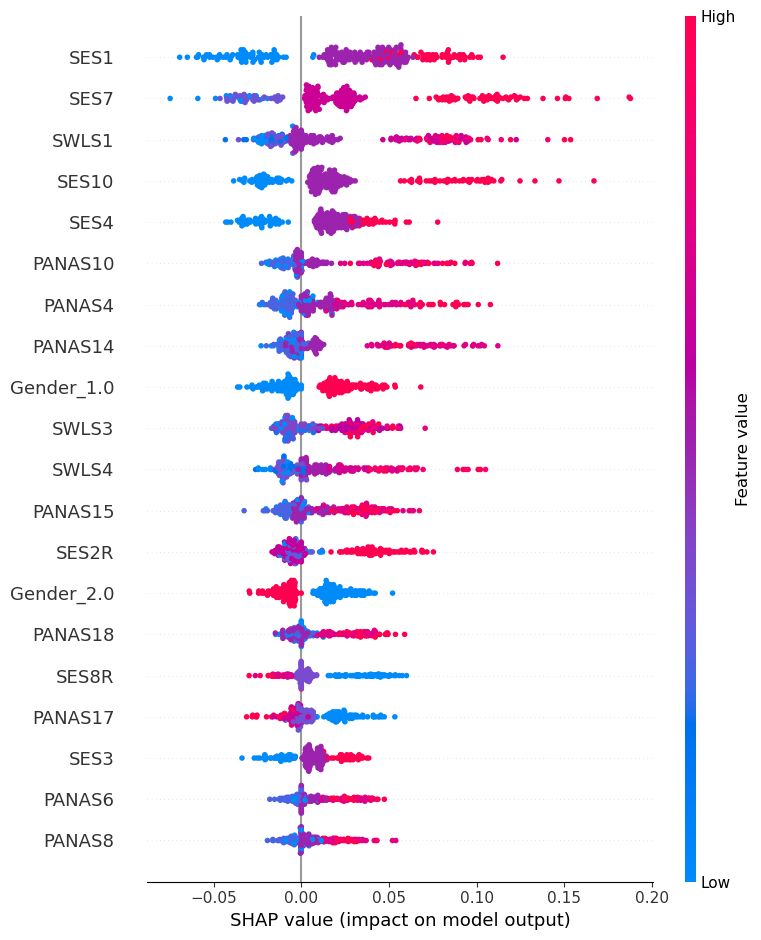

In [23]:
# Generate a SHAP summary plot
shap.summary_plot(shap_values, X_train)

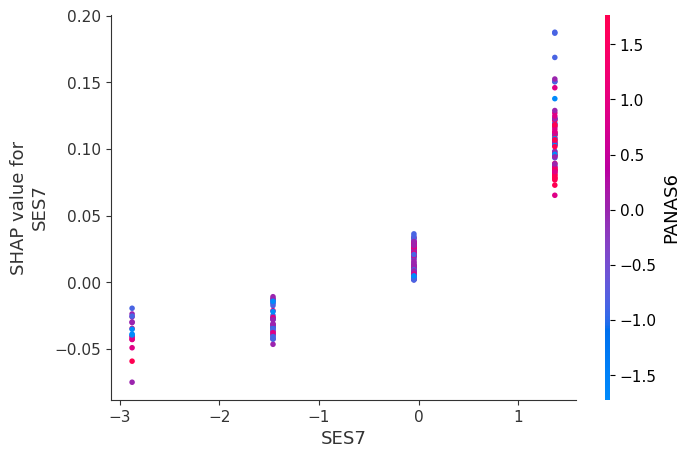

In [24]:
# Generate a SHAP dependence plot for the feature "SES7"
# In this section, we will generate a SHAP dependence plot to visualize the relationship between a specific feature and the model's predictions using the calculated SHAP values.
shap.dependence_plot("SES7", shap_values,X_train)

# 3. Exploratory Factor Analysis (EFA)

In this section, we will perform Exploratory Factor Analysis (EFA) to uncover the underlying factor structure in the data. EFA helps in identifying the latent variables that explain the patterns in the observed variables.

## 3.1 Preparing Data for EFA

To perform Exploratory Factor Analysis (EFA), we need to calculate the importance of variables and exclude those that do not meet a certain threshold. In this case, we will include variables that contribute up to 80% of the total importance and exclude demographic variables.

In [25]:
# Calculate cumulative importance
shap_values_train = np.array(shap_values)  
feature_importance = np.mean(np.abs(shap_values_train), axis=0)
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)
feature_importance_df['cumulative_importance'] = feature_importance_df['importance'].cumsum()
feature_importance_df['cumulative_importance'] /= feature_importance_df['importance'].sum()

In [26]:
# Determine the number of features to reach 80% importance
threshold = 0.8
num_important_features = (feature_importance_df['cumulative_importance'] <= threshold).sum()
print(f"Number of features to reach {threshold*100}% of importance: {num_important_features}")

Number of features to reach 80.0% of importance: 25


# Printing the Names and Importance of the Top Features
top_features = feature_importance_df.head(num_important_features)
important_feature_names = top_features['feature'].tolist()
print(top_features[['feature', 'importance']])

In [42]:
# Printing the Names and Importance of the Top Features
top_features = feature_importance_df.head(num_important_features)
important_feature_names = top_features['feature'].tolist()
print(top_features[['feature', 'importance']])

                         feature  importance
11                          SES1    0.044498
5                           SES7    0.043609
15                         SWLS1    0.035401
10                         SES10    0.031595
8                           SES4    0.023751
29                       PANAS10    0.022885
23                        PANAS4    0.022417
33                       PANAS14    0.021559
38                    Gender_1.0    0.019036
17                         SWLS3    0.018914
18                         SWLS4    0.018911
34                       PANAS15    0.018433
14                         SES2R    0.018421
39                    Gender_2.0    0.015276
37                       PANAS18    0.014001
12                         SES8R    0.013689
36                       PANAS17    0.012064
6                           SES3    0.011955
25                        PANAS6    0.011932
27                        PANAS8    0.010378
9                          SES5R    0.010033
7         

In [ ]:
# Exclude demographic variables
variables_to_remove = ['Gender_1.0', 'Gender_2.0','Major_1.0','Number of friends met online','Daily online duration']
important_feature_names = [feature for feature in important_feature_names if feature not in variables_to_remove]
important_data = data[important_feature_names]

## 3.2 Parallel Analysis to Determine the Number of Factors

To determine the appropriate number of factors for Exploratory Factor Analysis (EFA), we perform parallel analysis. This method compares the eigenvalues from the actual data with those from randomly generated data.

In [34]:
def parallel_analysis(data, n_iterations=1000):
    n_samples, n_features = data.shape
    random_eigenvalues = np.zeros((n_iterations, n_features))
    for i in range(n_iterations):
        random_data = np.random.normal(size=data.shape)
        pca = PCA()
        pca.fit(random_data)
        random_eigenvalues[i, :] = pca.explained_variance_
    mean_random_eigenvalues = random_eigenvalues.mean(axis=0)
    return mean_random_eigenvalues

def calculate_rmsea(chi_square, dof, n):
    rmsea = np.sqrt((chi_square - dof) / (dof * (n - 1)))
    return rmsea

def calculate_tli(chi_square, dof, chi_square_null, dof_null):
    tli = 1 - (chi_square / dof) / (chi_square_null / dof_null)
    return tli

**Bartlett's Test of Sphericity:** This test assesses whether the correlation matrix is an identity matrix, which would indicate that variables are unrelated. A significant result (p-value < 0.05) suggests that the correlation matrix is not an identity matrix, implying that the data is suitable for factor analysis.

**KMO Test:** The KMO test evaluates the adequacy of the correlation matrix for factor analysis. It measures the proportion of variance among variables that might be common variance. The KMO statistic ranges from 0 to 1, with values closer to 1 indicating that the data is suitable for factor analysis.


In [35]:
# Bartlett's Test of Sphericity
# To ensure that the variables are sufficiently correlated for factor analysis, we perform Bartlett's Test of Sphericity. This test checks whether the correlation matrix is significantly different from an identity matrix.
bartlett_test, p_value = calculate_bartlett_sphericity(important_data)
print(f"Bartlett's Test: Chi-square = {bartlett_test}, p-value = {p_value}")

# Perform the Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(important_data)
print(f"KMO Test: {kmo_model}")

Bartlett's Test: Chi-square = 4106.322170675893, p-value = 0.0
KMO Test: 0.8877496243387948


## 3.2 Parallel Analysis to Determine the Number of Factors

To determine the appropriate number of factors for Exploratory Factor Analysis (EFA), we perform parallel analysis. This method compares the eigenvalues from the actual data with those from randomly generated data.

In [36]:
pca = PCA()
pca.fit(important_data)
eigenvalues = pca.explained_variance_
mean_random_eigenvalues = parallel_analysis(important_data)
num_factors = np.sum(eigenvalues > mean_random_eigenvalues)
print(f"Number of factors to retain based on parallel analysis: {num_factors}")

Number of factors to retain based on parallel analysis: 4


In [37]:
# Create the FactorAnalyzer object, specifying the number of factors to retain
fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')
fa.fit(important_data)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [38]:
# Get the factor loadings
loadings = fa.loadings_
variable_names = important_data.columns.tolist()
num_factors = loadings.shape[1]
factor_names = [f'Factor{i+1}' for i in range(num_factors)]
factor_loadings_df = pd.DataFrame(loadings, index=variable_names,columns=factor_names)
# Remove loadings with absolute values less than 0.3
factor_loadings_df = factor_loadings_df.where(abs(factor_loadings_df) >= 0.3, '')
print("Factor Loadings: \n", factor_loadings_df)

Factor Loadings: 
           Factor1   Factor2   Factor3   Factor4
SES1               0.550873                    
SES7               0.716314                    
SWLS1                        0.540312          
SES10              0.631027                    
SES4                0.48444                    
PANAS10   0.81848                              
PANAS4   0.703686                              
PANAS14  0.690257                              
SWLS3                        0.663625          
SWLS4                        0.627508          
PANAS15  0.677559                              
SES2R                                   0.44281
PANAS18  0.770565                              
SES8R             -0.514435                    
PANAS17                                        
SES3                0.60223                    
PANAS6   0.751022                              
PANAS8    0.80572                              
SES5R                                  0.485346
SES9R                

In [41]:
#Evaluation of the Factor Analysis Model
# Sample and variable counts
n = important_data.shape[0]
p = important_data.shape[1]

# Calculate correlation matrix
corr_matrix = np.corrcoef(important_data, rowvar=False)

# Get loadings and uniquenesses
loadings = fa.loadings_
uniquenesses = 1 - np.sum(loadings**2, axis=1)

# Calculate model-implied correlation matrix
model_corr = loadings @ loadings.T
np.fill_diagonal(model_corr, model_corr.diagonal() + uniquenesses)

# Calculate chi-square using maximum likelihood method
log_det_corr = np.log(np.linalg.det(corr_matrix))
log_det_model = np.log(np.linalg.det(model_corr))
trace = np.trace(corr_matrix @ np.linalg.inv(model_corr)) - p
chi_square = (n - 1) * (log_det_model + trace - log_det_corr)

# Calculate degrees of freedom
dof = (p * (p + 1)) / 2 - (p * num_factors + p - (num_factors * (num_factors - 1)) / 2)

# Calculate null model chi-square
diag_corr = np.diag(np.diag(corr_matrix))
log_det_diag = np.log(np.linalg.det(diag_corr))
trace_null = np.trace(corr_matrix @ np.linalg.inv(diag_corr)) - p
chi_square_null = (n - 1) * (log_det_diag + trace_null - log_det_corr)
dof_null = p * (p - 1) / 2

# Calculate RMSEA 
rmsea = np.sqrt(max(0, (chi_square - dof) / (dof * (n - 1))))

# Calculate TLI
tli = ((chi_square_null / dof_null) - (chi_square / dof)) / ((chi_square_null / dof_null) - 1)

print(f"RMSEA: {rmsea:.4f}")
print(f"TLI: {tli:.4f}")
print(f"Chi-square: {chi_square:.4f}, df: {dof:.4f}")
print(f"p-value: {1 - stats.chi2.cdf(chi_square, dof):.4f}")

RMSEA: 0.0409
TLI: 0.9527
Chi-square: 230.5680, df: 116.0000
p-value: 0.0000


# # Extra Method 1: R and Python Interaction for Factor Analysis (Recommended)

The code utilizes the rpy2 interface to access R's psych package, preserving R's professional advantages in psychological statistical analysis while incorporating Python's flexibility and data processing capabilities. Users only need to provide appropriately formatted data files, and the system automatically handles R environment configuration, necessary package installation, data conversion, statistical analysis, and results presentation.

The framework supports multiple factor extraction methods and rotation techniques, while providing comprehensive model fit indicators such as RMSEA, TLI, and BIC. This integration delivers a powerful yet user-friendly solution for researchers and practitioners working with psychometric data, combining the best statistical tools from both programming ecosystems.



In [42]:
# Save the Data to CSV File
important_data.to_csv("factor_analysis_data_c.csv", index=False)
print("Factor analysis data successfully exported to factor_analysis_data.csv")

Factor analysis data successfully exported to factor_analysis_data.csv


In [43]:
# Set up R environment
import os
os.environ['R_HOME'] = r'C:\Program Files\R\R-4.3.3'  # Use your correct R installation path
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
from rpy2.robjects.conversion import localconverter

# Activate pandas to R data conversion
pandas2ri.activate()

def run_parallel_analysis(data_path, fa_method="both", n_iter=100, fm="ml"):
    """
    Run parallel analysis on the data with the specified method.
    
    Parameters:
    -----------
    data_path : str
        Path to the CSV file containing the data.
    fa_method : str
        Method for parallel analysis. Options: "pc", "fa", or "both".
    n_iter : int
        Number of iterations for simulation.
    fm : str
        Factor extraction method. Options: "ml", "minres", "pa", etc.
        
    Returns:
    --------
    dict
        A dictionary containing the analysis results.
    """
    try:
        # Import R base packages
        base = importr('base')
        utils = importr('utils')
        psych = importr('psych')
        
        # Read data
        df = pd.read_csv(data_path)
        print(f"Data successfully loaded: {df.shape[0]} rows and {df.shape[1]} columns")
        
        # Convert data to R dataframe
        with localconverter(ro.default_converter + pandas2ri.converter):
            r_df = ro.conversion.py2rpy(df)
        
        # Execute parallel analysis
        print(f"Starting parallel analysis with method: {fa_method}...")
        ro.r('set.seed(123)')

        r_setup = """
        pdf(file=NULL) 
        """
        ro.r(r_setup)

        # Use R string to execute parallel analysis
        r_code = f"""
        parallel_result <- function(df) {{
          library(psych)
          result <- fa.parallel(df, fa="{fa_method}", fm="{fm}", n.iter={n_iter}, sim=TRUE, show=FALSE)
          dev.off()  
          return(result)
        }}
        """
        ro.r(r_code)
        parallel_result = ro.r('parallel_result')(r_df)
        
        # Extract results based on analysis method
        result = {}
        
        if fa_method in ["fa", "both"]:
            n_factors = parallel_result.rx2('nfact')[0]
            result["n_factors"] = n_factors
            print(f"Suggested number of factors: {n_factors}")
        
        if fa_method in ["pc", "both"]:
            n_components = parallel_result.rx2('ncomp')[0]
            result["n_components"] = n_components
            print(f"Suggested number of components: {n_components}")
        
        # Extract relevant eigenvalues based on method
        r_extract_values = f"""
        extract_values <- function(result) {{
          list(
            observed = if("{fa_method}" == "pc") result$pc.values else if("{fa_method}" == "fa") result$fa.values else NULL,
            simulated = if("{fa_method}" == "pc") {{
              if(is.matrix(result$pc.sim)) colMeans(result$pc.sim) else result$pc.simr
            }} else if("{fa_method}" == "fa") {{
              if(is.matrix(result$fa.sim)) colMeans(result$fa.sim) else result$fa.simr
            }} else NULL,
            fa_observed = if("{fa_method}" == "both") result$fa.values else NULL,
            fa_simulated = if("{fa_method}" == "both") {{
              if(is.matrix(result$fa.sim)) colMeans(result$fa.sim) else result$fa.simr
            }} else NULL,
            pc_observed = if("{fa_method}" == "both") result$pc.values else NULL,
            pc_simulated = if("{fa_method}" == "both") {{
              if(is.matrix(result$pc.sim)) colMeans(result$pc.sim) else result$pc.simr
            }} else NULL
          )
        }}
        """
        ro.r(r_extract_values)
        extracted_values = ro.r('extract_values')(parallel_result)
        
        # Convert R values to Python
        with localconverter(ro.default_converter + pandas2ri.converter):
            if fa_method in ["pc", "fa"]:
                observed = ro.conversion.rpy2py(extracted_values.rx2('observed'))
                simulated = ro.conversion.rpy2py(extracted_values.rx2('simulated'))
                result["observed"] = observed
                result["simulated"] = simulated
            elif fa_method == "both":
                fa_observed = ro.conversion.rpy2py(extracted_values.rx2('fa_observed'))
                fa_simulated = ro.conversion.rpy2py(extracted_values.rx2('fa_simulated'))
                pc_observed = ro.conversion.rpy2py(extracted_values.rx2('pc_observed'))
                pc_simulated = ro.conversion.rpy2py(extracted_values.rx2('pc_simulated'))
                result["fa_observed"] = fa_observed
                result["fa_simulated"] = fa_simulated
                result["pc_observed"] = pc_observed
                result["pc_simulated"] = pc_simulated
        
        # Save suggested factor numbers to file
        #with open(f'suggested_factors_{fa_method}.txt', 'w') as f:
        #    if fa_method in ["fa", "both"]:
        #        f.write(f"Suggested number of factors: {n_factors}\n")
        #    if fa_method in ["pc", "both"]:
        #        f.write(f"Suggested number of components: {n_components}")
        
       # print(f"Parallel analysis completed with method '{fa_method}' and results saved to text file.")
        
        return result
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Example usage
if __name__ == "__main__":
    # Change this to the desired method: "pc", "fa", or "both"
    analysis_method = "both"
    
    # Run the analysis
    result = run_parallel_analysis("factor_analysis_data.csv", 
                                  fa_method=analysis_method,
                                  n_iter=100, 
                                  fm="pa")

Data successfully loaded: 590 rows and 18 columns
Starting parallel analysis with method: both...
Parallel analysis suggests that the number of factors =  5  and the number of components =  4 
Suggested number of factors: 5.0
Suggested number of components: 4.0


In [44]:
try:
    # Import R base packages
    base = importr('base')
    utils = importr('utils')
    stats = importr('stats')
    
    # Check and install necessary R packages
    package_names = ['psych', 'lavaan']
    utils.chooseCRANmirror(ind=1)  # Select CRAN mirror
    
    # Check if packages are installed, install if not
    names_to_install = [x for x in package_names if not ro.packages.isinstalled(x)]
    if len(names_to_install) > 0:
        print(f"Installing R packages: {', '.join(names_to_install)}")
        utils.install_packages(StrVector(names_to_install))
    
    # Import required R packages
    psych = importr('psych')
    lavaan = importr('lavaan')
    
    # Read data
    # Assuming your data is stored in a CSV file
    try:
        data_path = "factor_analysis_data.csv"  # Ensure this file exists
        df = pd.read_csv(data_path)
        print(f"Data successfully loaded: {df.shape[0]} rows and {df.shape[1]} columns")
        
        # Convert pandas dataframe to R dataframe
        with localconverter(ro.default_converter + pandas2ri.converter):
            r_df = ro.conversion.py2rpy(df)
        
        # Execute factor analysis
        print("Starting factor analysis...")
        fa_result = psych.fa(r_df, nfactors=5, rotate="varimax")
        
        # Extract results
        # Get fit indices
        rmsea = fa_result.rx2('RMSEA')[0]
        tli = fa_result.rx2('TLI')[0] if 'TLI' in fa_result.names else None
        bic = fa_result.rx2('BIC')[0] if 'BIC' in fa_result.names else None
        chi_square = fa_result.rx2('chi')[0] if 'chi' in fa_result.names else None
        df_value = fa_result.rx2('dof')[0] if 'dof' in fa_result.names else None
        p_value = fa_result.rx2('PVAL')[0] if 'PVAL' in fa_result.names else None
        
        # Create fit indices dataframe
        fit_indices = pd.DataFrame({
            'RMSEA': [rmsea],
            'TLI': [tli],
            'BIC': [bic],
            'chi_square': [chi_square],
            'df': [df_value],
            'p_value': [p_value]
        })
        
        # Get factor loadings
        loadings_r = fa_result.rx2('loadings')
        
        # Convert R matrix to pandas dataframe
        with localconverter(ro.default_converter + pandas2ri.converter):
            loadings_matrix = ro.conversion.rpy2py(loadings_r)
        
        # Create pandas dataframe from R matrix
        column_names = [f"Factor{i+1}" for i in range(loadings_matrix.shape[1])]
        loadings_df = pd.DataFrame(
            loadings_matrix, 
            index=df.columns, 
            columns=column_names
        )
        
        # Save results to CSV files (if needed)
        #fit_indices.to_csv("fit_indices.csv", index=False)
        #loadings_df.to_csv("factor_loadings.csv")
        
        # Display results
        print("\nFit indices:")
        print(fit_indices)
        print("\nFactor loadings:")
        print(loadings_df)
        
    except FileNotFoundError:
        print(f"Error: Data file '{data_path}' not found, please check the file path")
    except Exception as e:
        print(f"Error processing data: {str(e)}")

except ImportError as e:
    print(f"R package import error: {str(e)}")
    print("Please ensure R and required R packages are correctly installed")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Data successfully loaded: 590 rows and 18 columns
Starting factor analysis...

Fit indices:
      RMSEA       TLI         BIC  chi_square    df       p_value
0  0.042939  0.945156 -313.213678   78.931662  73.0  1.489879e-07

Factor loadings:
          Factor1   Factor2   Factor3   Factor4   Factor5
SES7     0.056371  0.084332  0.642120  0.030870 -0.095960
SES4     0.092064  0.097835  0.454660  0.150116 -0.050012
SWLS1    0.063922  0.633637  0.208401  0.194027 -0.110538
SES10    0.165196  0.156051  0.656110  0.099765 -0.121286
SES1     0.156740  0.176113  0.612700  0.072018  0.003257
PANAS14  0.696934  0.085690  0.064843  0.116249  0.145941
SWLS4    0.123976  0.599890  0.053806  0.104048  0.015103
PANAS4   0.729672  0.058781  0.097422  0.041751 -0.034468
SWLS3    0.218622  0.582306  0.274662  0.029599 -0.121815
PANAS15  0.677098  0.113160  0.198627  0.075427  0.078660
SES2R    0.098297  0.073363  0.283429  0.429853 -0.035369
PANAS17  0.148029 -0.117334 -0.188548 -0.135225  0.562757
SES5